In [39]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix
##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [40]:
## warning 
import warnings 
warnings.filterwarnings('ignore')

In [41]:
## load the dataset
mushroom = pd.read_csv('mushrooms.csv')
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [42]:
##checking if there is any blank
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#No balnk row or any missing data 
but column 11 ( stalk- root) has some question marks, so need to be deleted

In [43]:
# Checking if there is any duplicates
mushroom.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# There is no duplicated data

column 'stalk-root has some question marks and veil-type is only one letter for whole column, therefore we delete both.

In [44]:
mushroom = mushroom.drop(['stalk-root', 'veil-type'], axis=1)

In [45]:
print(mushroom.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')


In [46]:
## Label encoding the whole data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mushroom1= mushroom.apply(LabelEncoder().fit_transform)
mushroom1.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [47]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = mushroom1.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.00,0.05,0.18,-0.03,-0.50,-0.09,0.13,-0.35,0.54,-0.53,...,-0.33,-0.30,-0.15,-0.15,0.15,-0.21,-0.41,0.17,0.30,0.22
cap-shape,0.05,1.00,-0.05,-0.05,-0.04,-0.02,0.08,0.01,0.05,-0.01,...,-0.03,-0.03,-0.03,-0.03,0.07,-0.11,-0.03,-0.07,0.06,-0.04
cap-surface,0.18,-0.05,1.00,-0.02,0.07,0.05,-0.03,-0.28,0.21,-0.16,...,0.09,0.11,0.07,0.07,-0.02,-0.03,-0.11,0.23,0.02,0.16
cap-color,-0.03,-0.05,-0.02,1.00,-0.00,-0.39,0.04,0.14,-0.17,0.08,...,-0.06,-0.05,0.00,0.01,0.04,-0.01,0.16,-0.29,-0.14,0.03
bruises,-0.50,-0.04,0.07,-0.00,1.00,-0.06,0.14,-0.30,-0.37,0.53,...,0.46,0.46,0.08,0.09,0.12,0.06,0.69,-0.29,0.09,-0.08
odor,-0.09,-0.02,0.05,-0.39,-0.06,1.00,-0.06,0.06,0.31,-0.13,...,0.12,0.06,0.17,0.17,-0.06,0.11,-0.28,0.47,-0.04,-0.03
gill-attachment,0.13,0.08,-0.03,0.04,0.14,-0.06,1.00,0.07,0.11,-0.13,...,-0.09,-0.12,0.10,0.10,0.90,0.09,-0.15,-0.03,0.17,-0.03
gill-spacing,-0.35,0.01,-0.28,0.14,-0.30,0.06,0.07,1.00,-0.11,0.10,...,-0.21,-0.21,0.27,0.25,0.07,0.24,-0.20,0.05,-0.53,-0.15
gill-size,0.54,0.05,0.21,-0.17,-0.37,0.31,0.11,-0.11,1.00,-0.52,...,0.06,0.01,0.30,0.28,0.10,-0.17,-0.46,0.62,0.15,0.16
gill-color,-0.53,-0.01,-0.16,0.08,0.53,-0.13,-0.13,0.10,-0.52,1.00,...,0.22,0.26,-0.06,-0.07,-0.10,0.10,0.63,-0.42,-0.03,-0.20


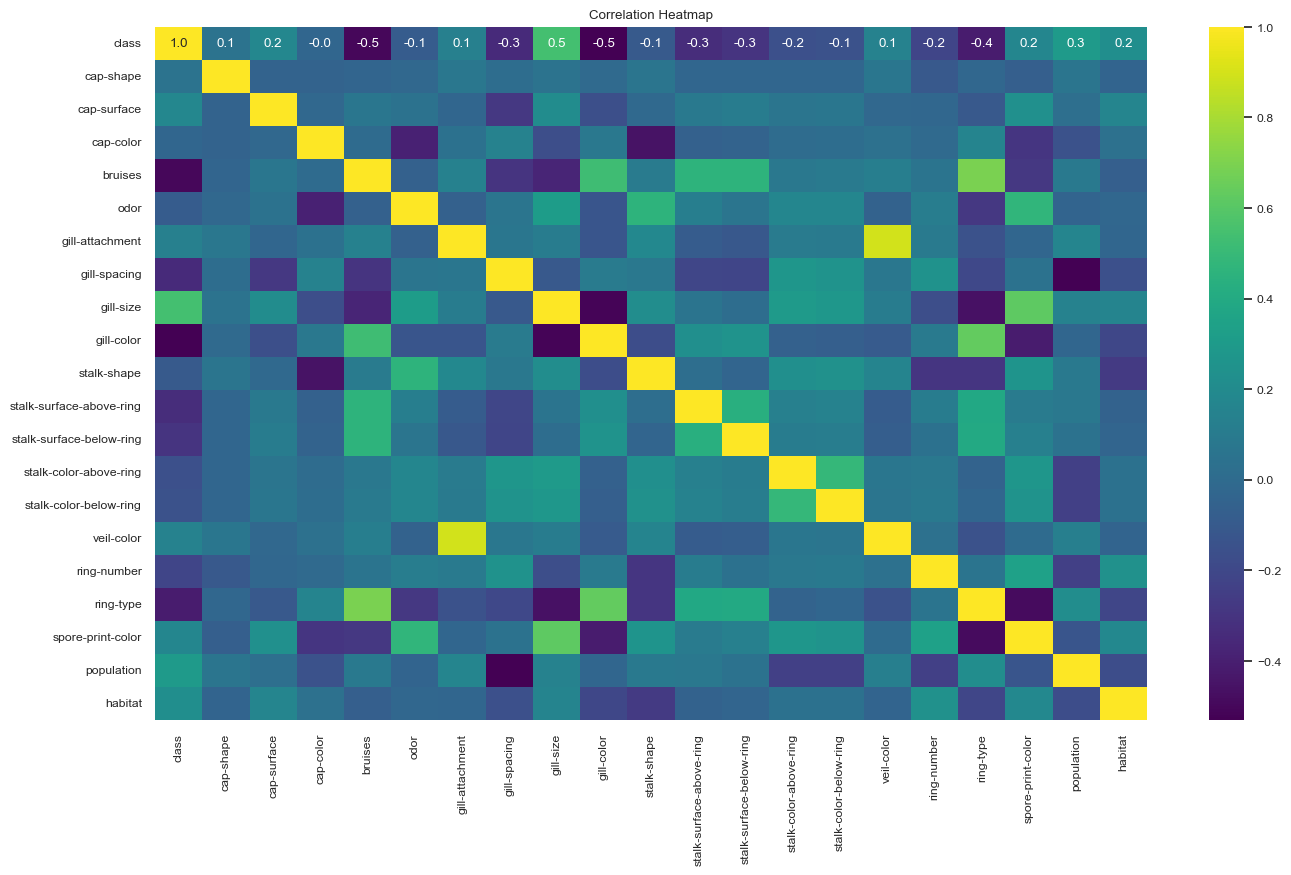

In [48]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = mushroom1.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat


plt.figure(figsize=(16,9))
sns.heatmap(corr_mat, annot=True, cmap="viridis", fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

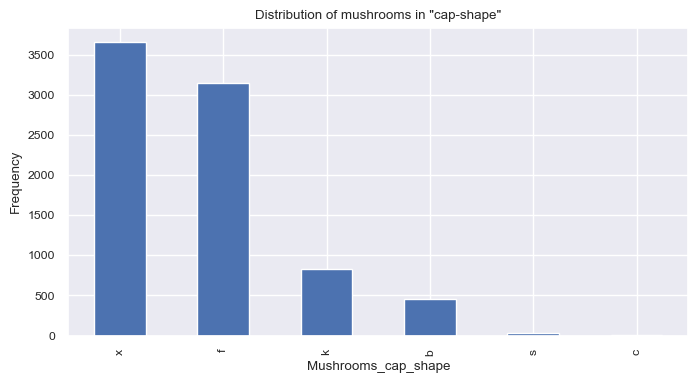

In [49]:
# Visualizing 
plt.figure(figsize=(8, 4))
mushroom['cap-shape'].value_counts().plot(kind='bar')
plt.title('Distribution of mushrooms in "cap-shape"')
plt.xlabel('Mushrooms_cap_shape')
plt.ylabel('Frequency')
plt.show()

## Bar charts/ Poisonous and Edible
Investaigatiing of different features comparing the amount of Poisonous vs Edible applying Bar charts 

In [50]:
# Create a dictionary to map letters to labels
class_mapping = {'p': 'Poisonous', 'e': 'Edible'}

# Apply the mapping to the "class" column and create a new column "class_label"
mushroom['class_label'] = mushroom['class'].map(class_mapping)

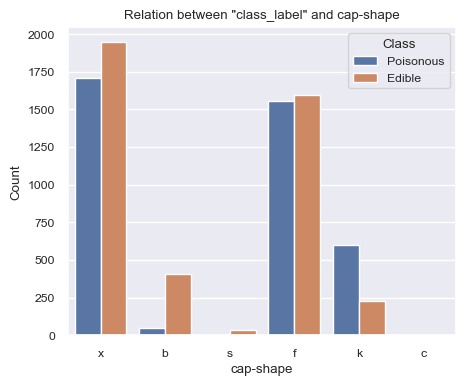

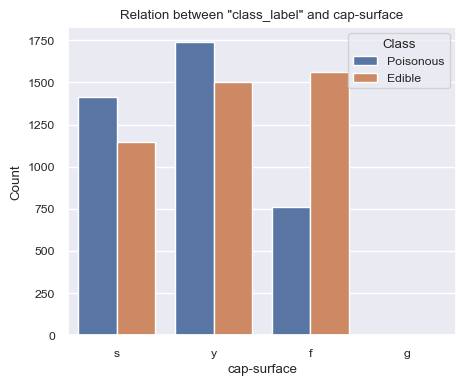

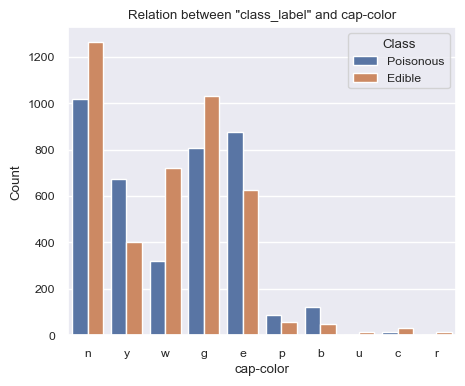

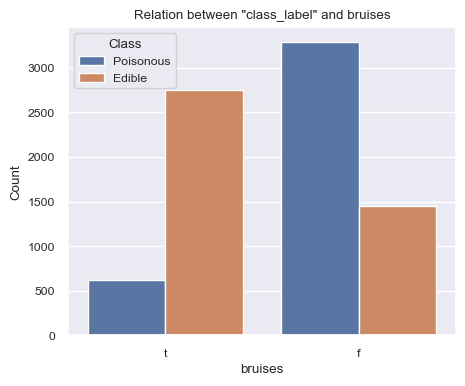

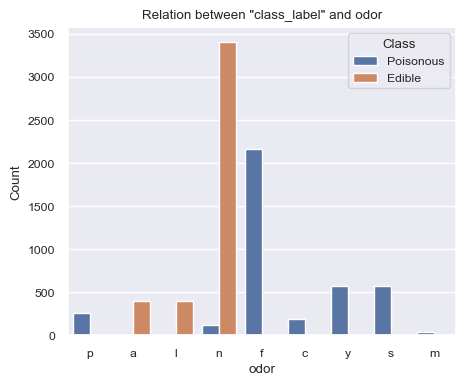

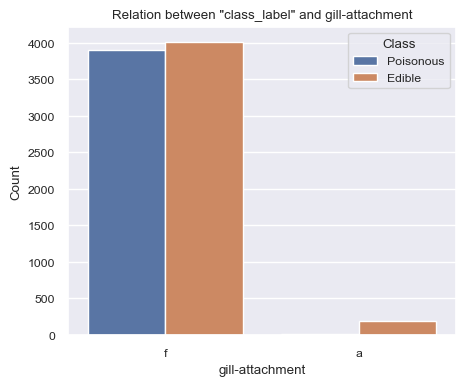

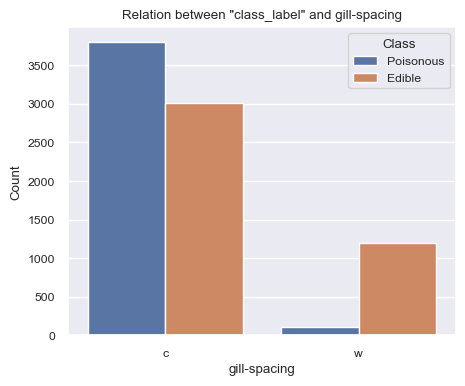

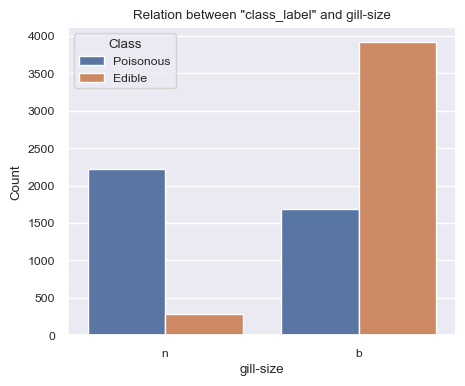

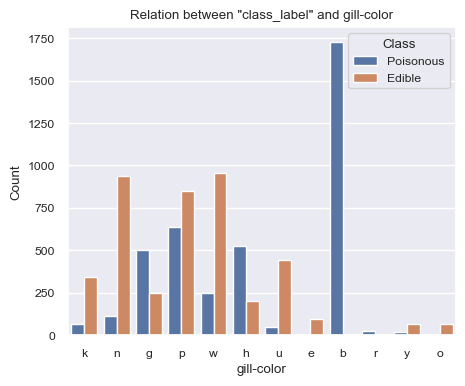

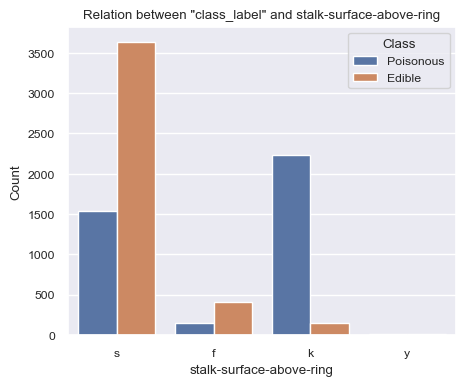

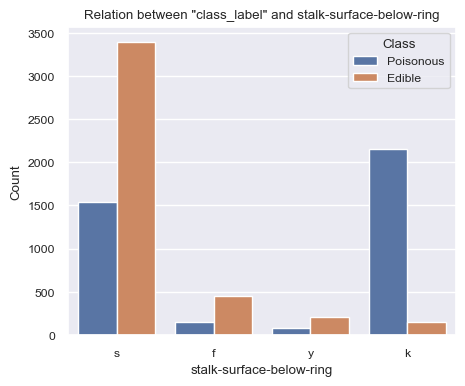

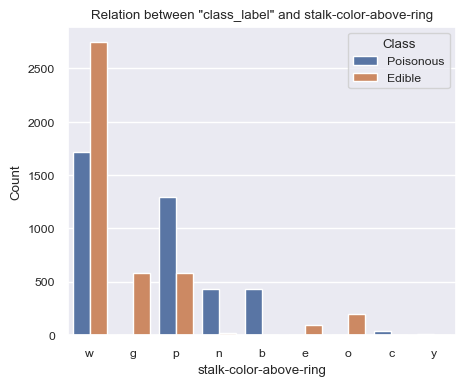

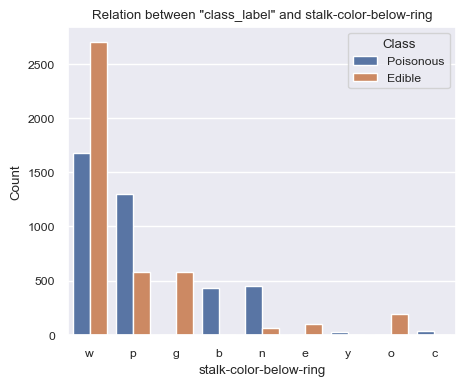

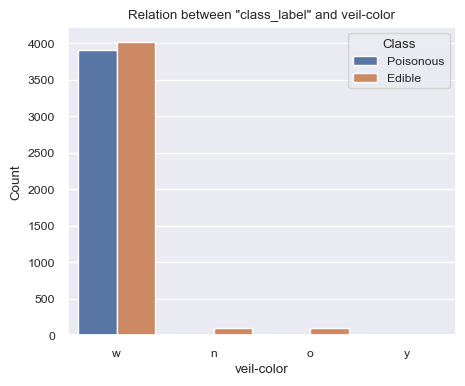

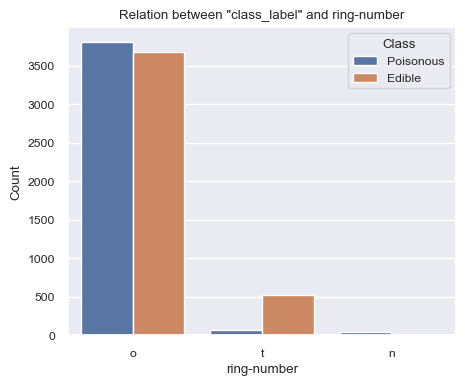

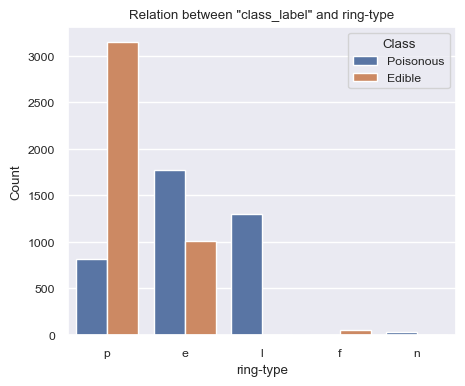

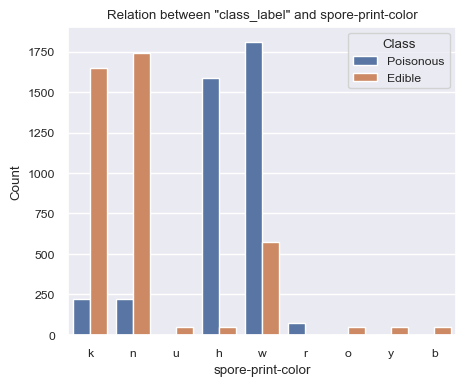

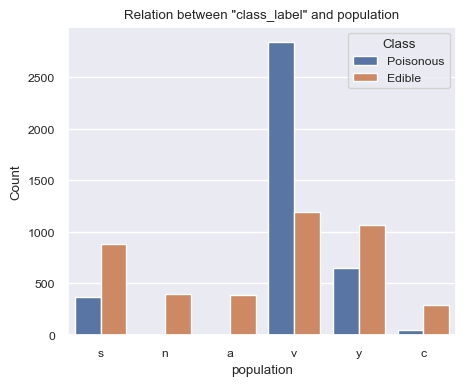

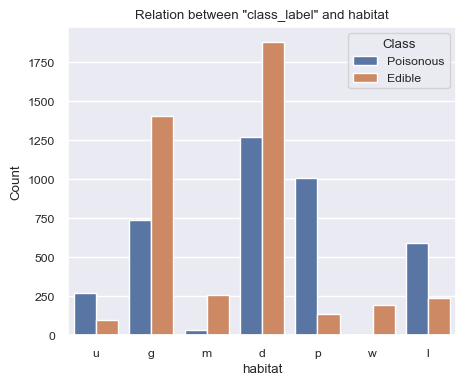

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
            'gill-spacing', 'gill-size', 'gill-color', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
            'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

for col in columns_to_visualize:
    plt.figure(figsize=(5, 4))
    sns.countplot(x=col, hue='class_label', data=mushroom)
    plt.title(f'Relation between "class_label" and {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Class')
    plt.show()

class	cap-shape	cap-surface	cap-color	bruises	odor	gill-attachment	gill-spacing	gill-size	gill-color	...	stalk-surface-below-ring	stalk-color-above-ring	stalk-color-below-ring	veil-type	veil-color	ring-number	ring-type	spore-print-color	population	habita

## PIE chart of 5 top Poisonous Mushroum
Grouped by(cap-shape, surface-shape and Habitat)

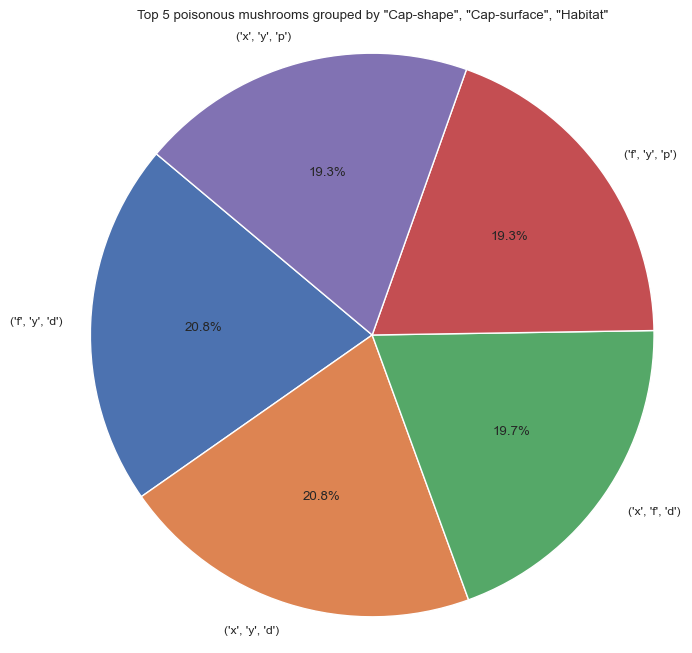

In [52]:
# Group by the selected features and sum the 'health' column
top_5_p = mushroom.groupby(['cap-shape', 'cap-surface', 'habitat'])['class'].apply(lambda x: (x == 'p').sum()).nlargest(5)

# Create a pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(top_5_p, labels=top_5_p.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 poisonous mushrooms grouped by "Cap-shape", "Cap-surface", "Habitat"')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


In [53]:
## Label encoding the whole data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mushroom1= mushroom.apply(LabelEncoder().fit_transform)
mushroom1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class_label
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,2,1,4,2,3,5,1
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,2,1,4,3,2,1,0
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,2,1,4,3,2,3,0
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,2,1,4,2,3,5,1
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,2,1,0,3,0,1,0


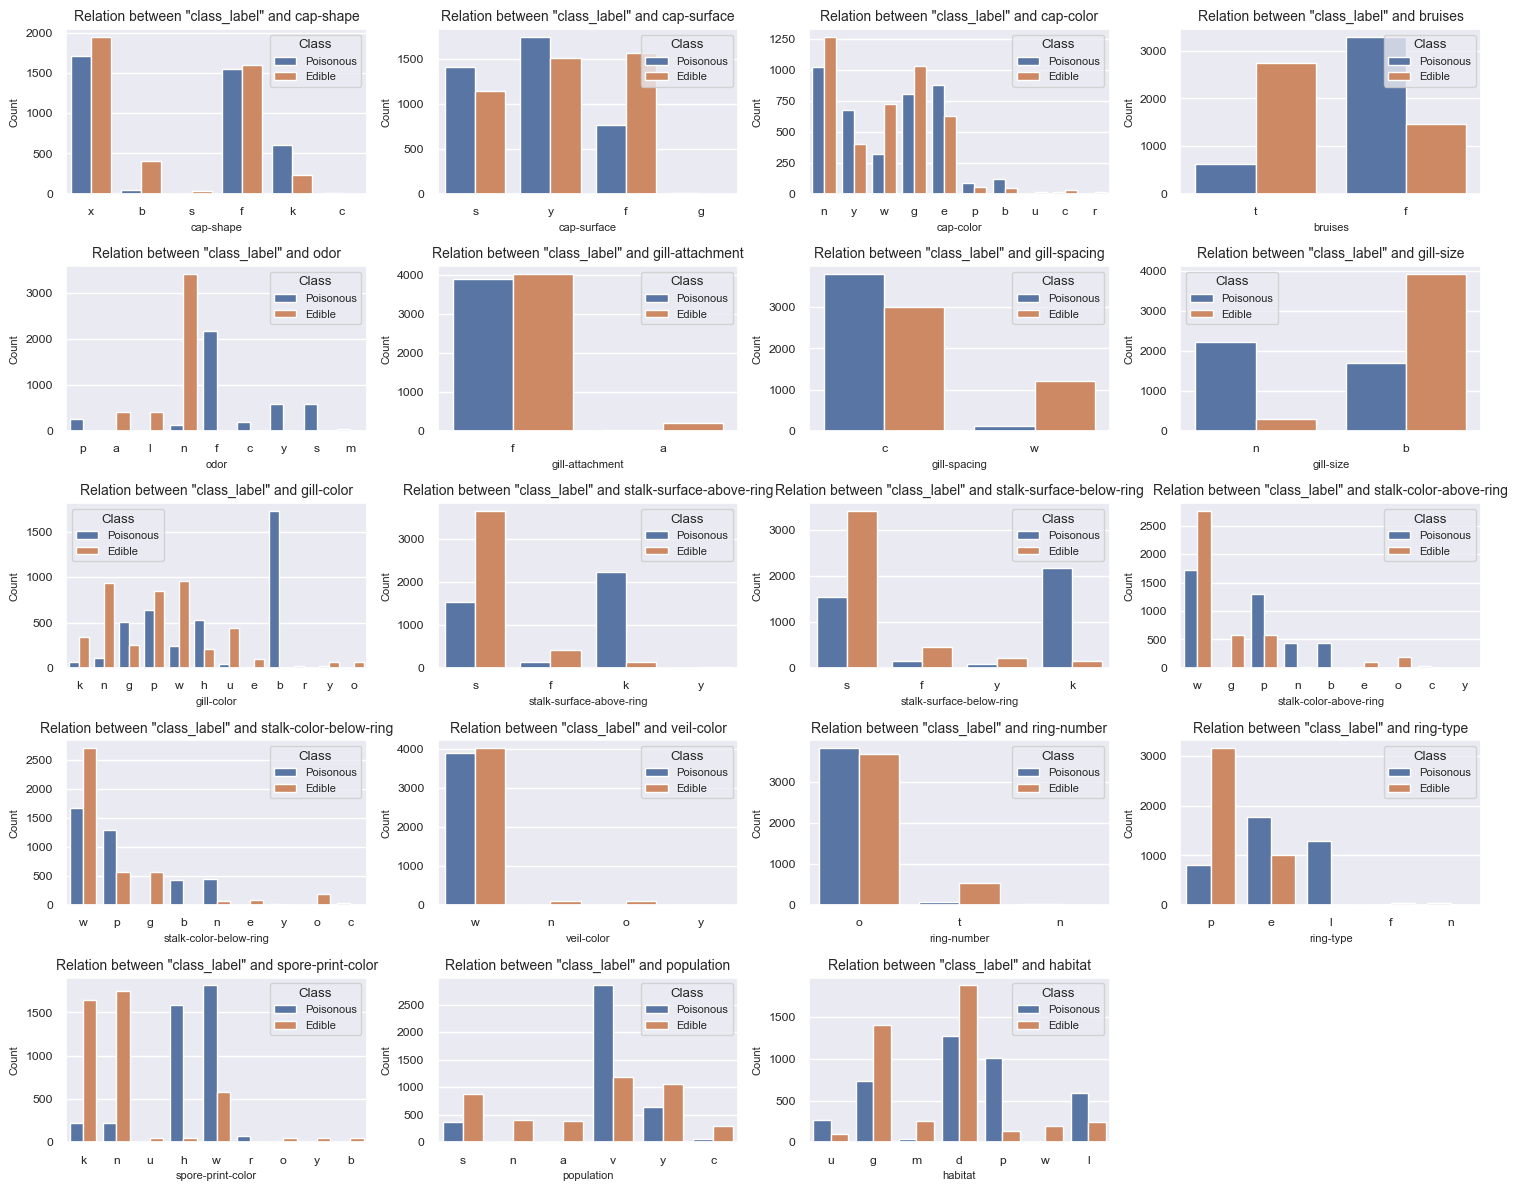

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_visualize = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
            'gill-spacing', 'gill-size', 'gill-color', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
            'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Calculate the number of rows and columns for the subplots
num_cols = 4
num_rows = (len(columns_to_visualize) - 1) // num_cols + 1

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Set the font size for various elements
sns.set(font_scale=0.8)  # You can adjust the scale value as needed

# Loop through the columns and create count plots
for i, col in enumerate(columns_to_visualize):
    ax = axes[i]
    sns.countplot(x=col, hue='class_label', data=mushroom, ax=ax)
    ax.set_title(f'Relation between "class_label" and {col}', fontsize=10)  # Adjust title font size
    ax.set_xlabel(col, fontsize=8)  # Adjust x-axis label font size
    ax.set_ylabel('Count', fontsize=8)  # Adjust y-axis label font size
    ax.legend(title='Class', fontsize=8)  # Adjust legend font size

# Remove empty subplots
for i in range(len(columns_to_visualize), num_cols * num_rows):
    fig.delaxes(axes[i])

# Adjust layout
fig.tight_layout()
plt.show()


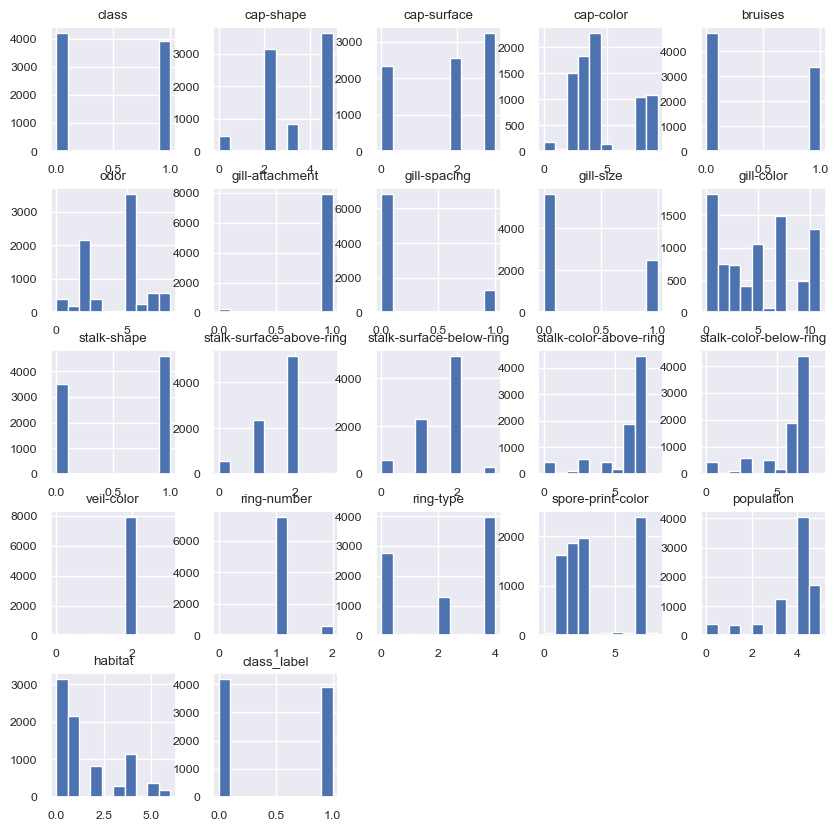

In [55]:
#  plot the distribution for all the numerical features.
mushroom1.hist(bins=10,figsize=(10,10));

In [56]:
##from max export to lower
# Sort the DataFrame by 'export' in descending order and select the top 10 rows
#top_10_poisonous = mushroom.sort_values(by='features', ascending=False).head(20)

# Create a bar chart to visualize 'features' and 'import'
#plt.figure(figsize=(8, 6))
#sns.set_style("whitegrid")
#sns.barplot(data=top_10_features, x='country', y='exports', color='red', label='Exports')
#sns.barplot(data=top_10_features, x='country', y='imports', color='blue', label='Imports')
#plt.title("Exports and Imports for Top 10 Countries")
#plt.xlabel('Country')
#plt.ylabel('Value')
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()


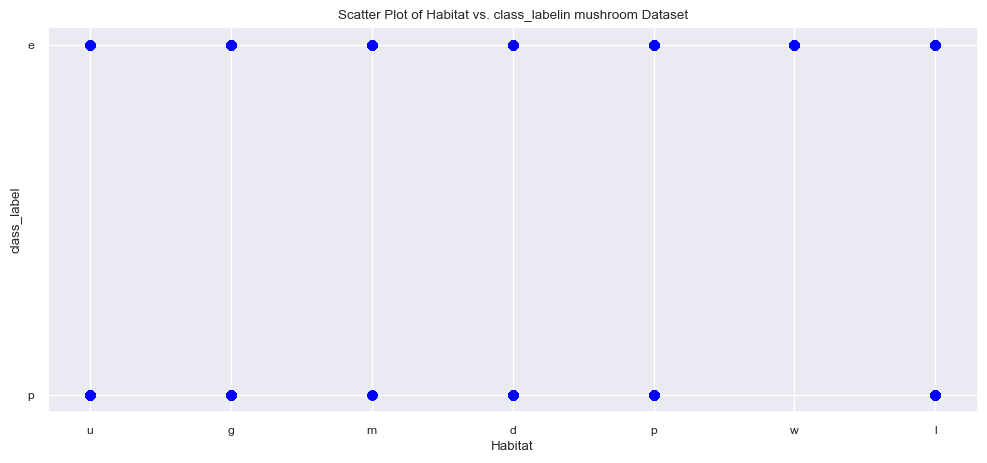

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))

# Scatter Plot
ax.scatter(mushroom['habitat'],mushroom['class'], c='blue')
ax.set_xlabel('Habitat')
ax.set_ylabel('class_label')  # Adjusted y-axis label
ax.set_title('Scatter Plot of Habitat vs. class_labelin mushroom Dataset')  # Improved title
  # Add grid lines for better readability

plt.show()